In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing    

In [25]:
data = pd.read_csv("/home/prateek/Prateek/Courses/DataScience/Project/spotify_music_consolidated.csv")

In [26]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,popularity,time_signature,duration_ms
0,0,0,Let It Be (Super Deluxe),1,2CEujT1Tuv3jIIjUyUvupg,Two Of Us - 2021 Mix,spotify:track:2CEujT1Tuv3jIIjUyUvupg,0.0356,0.692,0.756,0.000088,0.2190,-9.677,0.0402,109.111,0.826,7,58,4,216480
1,1,1,Let It Be (Super Deluxe),2,5pbQlOzqzTacF4wbzmWEeA,Dig A Pony - 2021 Mix,spotify:track:5pbQlOzqzTacF4wbzmWEeA,0.1830,0.461,0.500,0.000010,0.2090,-8.023,0.0478,118.377,0.393,11,56,3,234760
2,2,2,Let It Be (Super Deluxe),3,47q5q2VZ0y264CNDdUAjZY,Across The Universe - 2021 Mix,spotify:track:47q5q2VZ0y264CNDdUAjZY,0.5520,0.414,0.467,0.000023,0.0779,-9.189,0.0270,76.148,0.752,1,56,4,228093
3,3,3,Let It Be (Super Deluxe),4,5sFSXKwsf1KvKpZngwVtlI,I Me Mine - 2021 Mix,spotify:track:5sFSXKwsf1KvKpZngwVtlI,0.1400,0.423,0.587,0.000000,0.1180,-8.140,0.0415,128.470,0.575,4,55,4,145053
4,4,4,Let It Be (Super Deluxe),5,211vMasdcN1n4Xy4ci76Eq,Dig It - 2021 Mix,spotify:track:211vMasdcN1n4Xy4ci76Eq,0.4520,0.519,0.564,0.004860,0.2730,-9.868,0.0742,155.067,0.795,5,54,3,50653


### From the above cell we can see there are some columns which are unnamed and holds no significant value and some columns like url which might not be useful. These columns can be dropped.

In [27]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1','uri','track_number'], axis=1)  #dropping the unwanted columns

In [28]:
data = data.reindex(columns=['id','album','name','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','key','popularity','time_signature','duration_ms'])
#rearranged the index of columns

In [29]:
data.head(3)

,id,album,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,popularity,time_signature,duration_ms
0,2CEujT1Tuv3jIIjUyUvupg,Let It Be (Super Deluxe),Two Of Us - 2021 Mix,0.0356,0.692,0.756,0.000088,0.2190,-9.677,0.0402,109.111,0.826,7,58,4,216480
1,5pbQlOzqzTacF4wbzmWEeA,Let It Be (Super Deluxe),Dig A Pony - 2021 Mix,0.1830,0.461,0.500,0.000010,0.2090,-8.023,0.0478,118.377,0.393,11,56,3,234760
2,47q5q2VZ0y264CNDdUAjZY,Let It Be (Super Deluxe),Across The Universe - 2021 Mix,0.5520,0.414,0.467,0.000023,0.0779,-9.189,0.0270,76.148,0.752,1,56,4,228093


In [30]:
data.dtypes   #checking the data types

id                   object
album                object
name                 object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
key                   int64
popularity            int64
time_signature        int64
duration_ms           int64
dtype: object

In [31]:
data.isna().sum()   #no missing values

id                  0
album               0
name                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
key                 0
popularity          0
time_signature      0
duration_ms         0
dtype: int64

In [32]:
duplicate= data[data.duplicated()]
print("number of duplicate rows:" , duplicate.shape)     #check for duplicates

number of duplicate rows: (0, 16)


In [33]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,4180.0,0.284471,0.319660,0.000003,0.01890,0.132000,0.50050,0.996
danceability,4180.0,0.525486,0.179371,0.000000,0.39600,0.522500,0.65500,0.974
energy,4180.0,0.614855,0.232171,0.001190,0.45075,0.629000,0.81100,0.999
instrumentalness,4180.0,0.130294,0.278499,0.000000,0.00000,0.000079,0.03055,0.998
liveness,4180.0,0.310921,0.287592,0.000000,0.10400,0.166000,0.41025,1.000
loudness,4180.0,-9.083777,4.672072,-41.210000,-11.12900,-8.128500,-5.81525,0.497
speechiness,4180.0,0.099573,0.145436,0.000000,0.03590,0.048650,0.08620,0.966
tempo,4180.0,119.790164,29.981994,0.000000,96.75175,118.989000,139.12550,209.242
valence,4180.0,0.459431,0.242728,0.000000,0.26600,0.440000,0.64400,0.980
key,4180.0,5.133493,3.529844,0.000000,2.00000,5.000000,8.00000,11.000


We need to scale/normalise our dataset as some features have higher values than others for eg. tempo has values in 100s, loudness has negative values.

In [34]:
top10songs = data.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)  #finding top 10 popular songs
top10songs

name
Fair Trade (with Travis Scott)                    93.0
Way 2 Sexy (with Future & Young Thug)             93.0
Blinding Lights                                   92.0
Knife Talk (with 21 Savage ft. Project Pat)       92.0
Girls Want Girls (with Lil Baby)                  91.0
Champagne Poetry                                  87.0
Save Your Tears                                   87.0
Memories                                          86.0
Beautiful Mistakes (feat. Megan Thee Stallion)    86.0
The Hills                                         85.0
Name: popularity, dtype: float64

### The top song is Fair Trade by Travis Scott, Second is way 2 Sexy by Future & Young Thugand third is blinding lights by the weeknd

In [35]:
top10artists = data.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
top10artists

album
Certified Lover Boy                  83.238095
PRISM                                75.000000
25                                   74.454545
folklore                             72.500000
After Hours                          72.357143
channel ORANGE (Explicit Version)    72.000000
AM                                   71.916667
Lover                                71.833333
reputation                           71.800000
Punk                                 70.900000
Name: popularity, dtype: float64

### The top album is Certified boy lover, Second is Prism and third is 25.

In [36]:
numeric_data = data.drop(['id','album','name'], axis=1)

In [37]:
correlation = numeric_data.corr()      #correlation matrix 
correlation

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,popularity,time_signature,duration_ms
acousticness,1.000000,-0.096883,-0.682979,0.326732,-0.067196,-0.597346,0.149025,-0.196483,-0.159466,-0.035139,-0.179462,-0.163086,-0.069479
danceability,-0.096883,1.000000,-0.052674,-0.236262,-0.355410,0.227839,0.242653,-0.063965,0.398078,0.003978,0.286811,0.148506,-0.211671
energy,-0.682979,-0.052674,1.000000,-0.261543,0.230908,0.713074,-0.102137,0.236559,0.298405,0.059246,0.031404,0.171695,0.073809
instrumentalness,0.326732,-0.236262,-0.261543,1.000000,0.017369,-0.499637,-0.151797,-0.107125,-0.146519,-0.002423,-0.387670,-0.078324,0.182428
liveness,-0.067196,-0.355410,0.230908,0.017369,1.000000,-0.048035,-0.001539,-0.015076,-0.133588,0.028008,-0.282363,0.001410,0.251064
loudness,-0.597346,0.227839,0.713074,-0.499637,-0.048035,1.000000,-0.128834,0.221751,0.237533,0.019823,0.316609,0.162286,-0.014968
speechiness,0.149025,0.242653,-0.102137,-0.151797,-0.001539,-0.128834,1.000000,-0.020843,0.087761,0.023342,-0.014363,-0.068390,-0.186384
tempo,-0.196483,-0.063965,0.236559,-0.107125,-0.015076,0.221751,-0.020843,1.000000,0.100415,0.009510,0.085063,0.069489,-0.018685
valence,-0.159466,0.398078,0.298405,-0.146519,-0.133588,0.237533,0.087761,0.100415,1.000000,0.036680,0.025563,0.112217,-0.222989
key,-0.035139,0.003978,0.059246,-0.002423,0.028008,0.019823,0.023342,0.009510,0.036680,1.000000,-0.031236,0.022410,0.007751


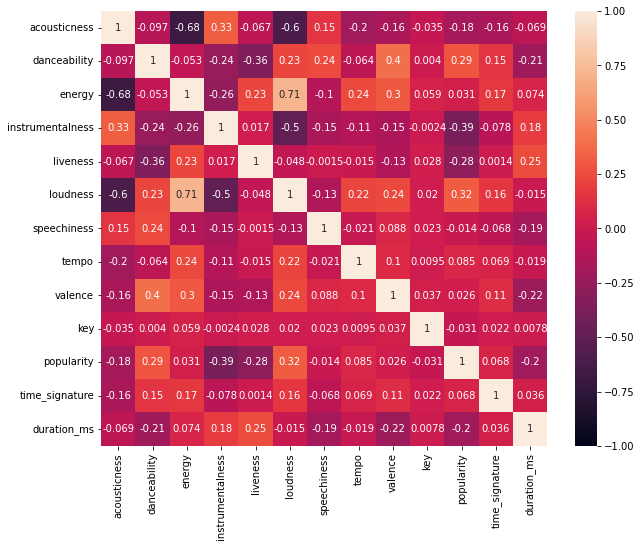

In [38]:
corrmap = plt.subplots( figsize = (10,8))
corrmap = sns.heatmap(correlation, annot = True, vmin=-1)       #Heatmap to visualize the above correlation matrix

### Not much correlation between the features 

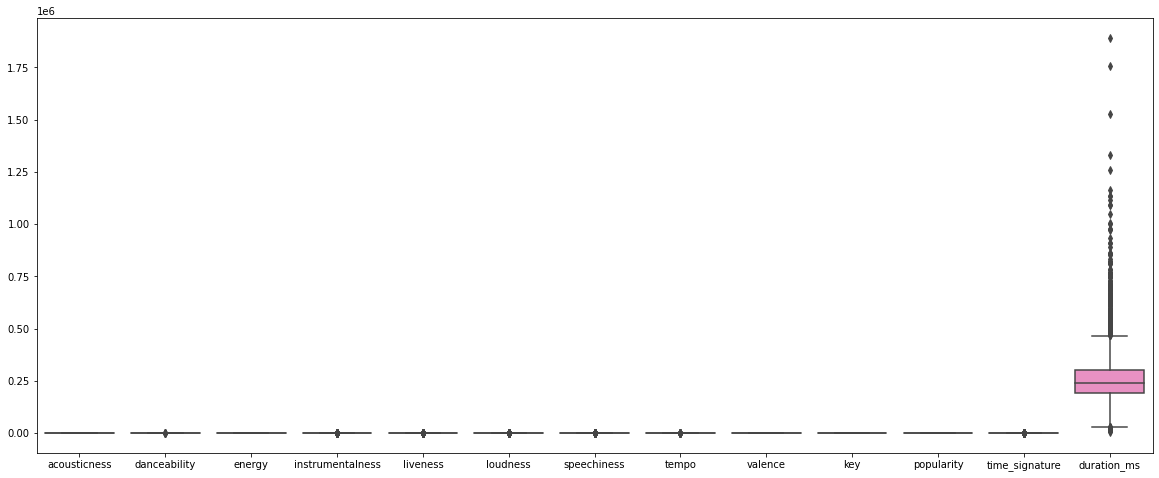

In [39]:
boxPlot = plt.subplots(figsize = (20,8))
boxPlot=sns.boxplot(data=numeric_data)           #boxplot before unscaled data

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

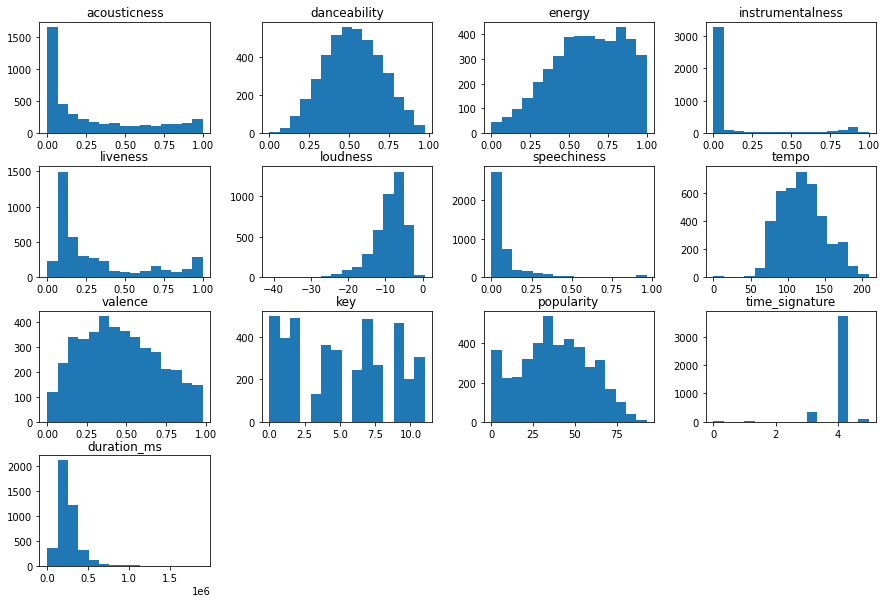

In [40]:
numeric_data.hist(figsize=(15,10),bins=15, grid = False)     #histogram of data

In [41]:
scaler = preprocessing.MinMaxScaler()                    #minmax scaling data between 0 to 1 range
features = numeric_data.columns
scaled_minmax= scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_minmax, columns=features)            
scaled_data.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,popularity,time_signature,duration_ms
0,0.035740,0.710472,0.756467,0.000088,0.2190,0.756060,0.041615,0.521458,0.842857,0.636364,0.623656,0.8,0.111954
1,0.183733,0.473306,0.499905,0.000010,0.2090,0.795718,0.049482,0.565742,0.401020,1.000000,0.602151,0.6,0.121644
2,0.554216,0.425051,0.466832,0.000023,0.0779,0.767761,0.027950,0.363923,0.767347,0.090909,0.602151,0.8,0.118110
3,0.140560,0.434292,0.587096,0.000000,0.1180,0.792912,0.042961,0.613978,0.586735,0.363636,0.591398,0.8,0.074089
4,0.453814,0.532854,0.564045,0.004870,0.2730,0.751481,0.076812,0.741089,0.811224,0.454545,0.580645,0.6,0.024046


In [42]:
scaled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
acousticness,4180.0,0.285611,0.320945,0.0,0.018973,0.132528,0.502509,1.0
danceability,4180.0,0.539513,0.184159,0.0,0.406571,0.536448,0.672485,1.0
energy,4180.0,0.615012,0.232680,0.0,0.450547,0.629188,0.811587,1.0
instrumentalness,4180.0,0.130556,0.279057,0.0,0.000000,0.000079,0.030611,1.0
liveness,4180.0,0.310921,0.287592,0.0,0.104000,0.166000,0.410250,1.0
loudness,4180.0,0.770284,0.112021,0.0,0.721246,0.793188,0.848653,1.0
speechiness,4180.0,0.103077,0.150555,0.0,0.037164,0.050362,0.089234,1.0
tempo,4180.0,0.572496,0.143289,0.0,0.462392,0.568667,0.664902,1.0
valence,4180.0,0.468808,0.247682,0.0,0.271429,0.448980,0.657143,1.0
key,4180.0,0.466681,0.320895,0.0,0.181818,0.454545,0.727273,1.0


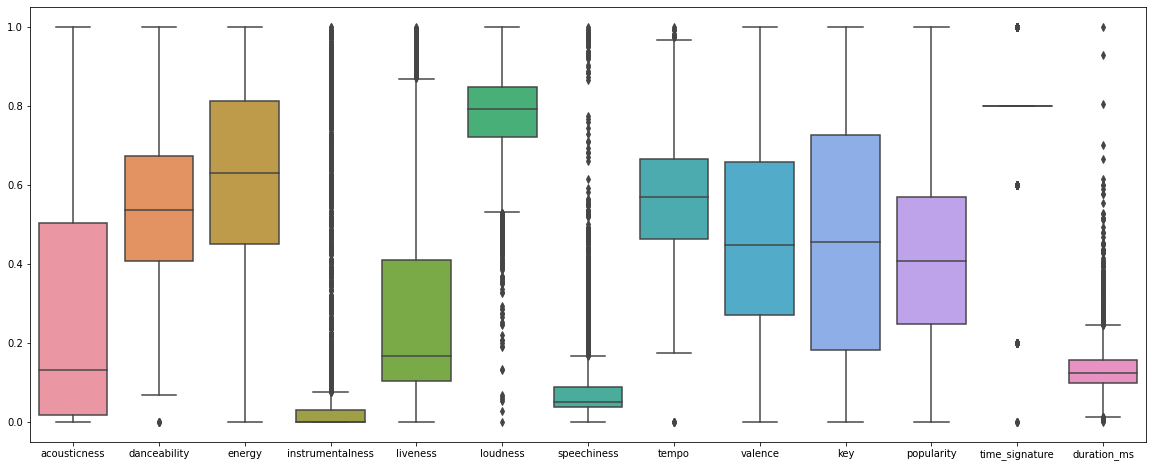

In [43]:
box = plt.subplots(figsize = (20,8))
box=sns.boxplot(data=scaled_data)             #boxplot after scaling data

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

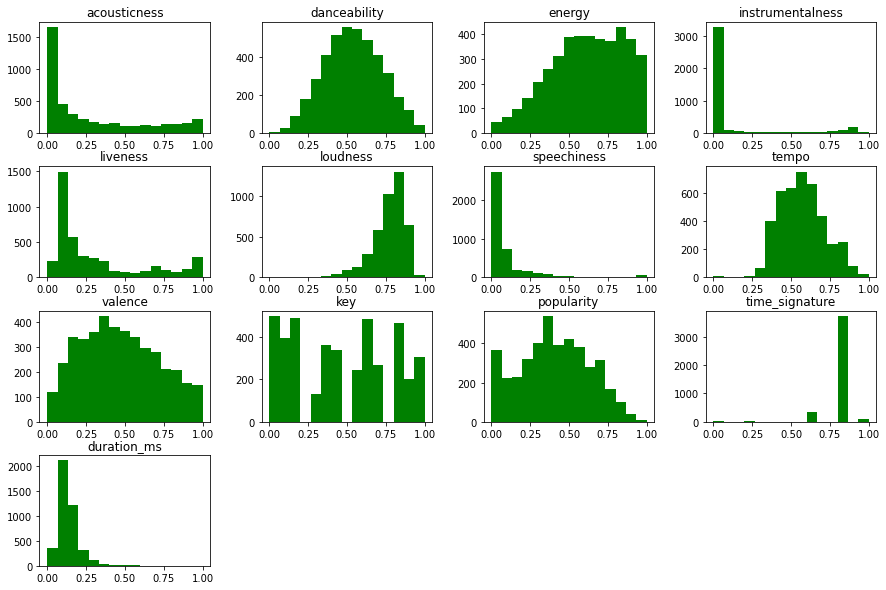

In [44]:
scaled_data.hist(figsize=(15,10),bins=15, grid = False, color = "green")    #scaling does not affect data distribution

### Feature scaling is done when the data is used on models like regression, neural nets i.e models that use gradient descent for optimisation. If scaling is not done then each feature tends to have a different step size during gradient descent. Distance based models like K-means also require feature scaling. Here we have normalised the data using minmax scaler.

In [45]:
pca = PCA(n_components = 13)                 #input the required number of components and perform pca on data
components = pca.fit_transform(scaled_data)   

In [46]:
print(pca.explained_variance_ratio_ *100)    #shows variance of each component 

[26.98527655 17.55516892 15.99554278 10.53423577  9.33269802  4.85358074
  4.30171096  3.15408692  2.72554977  2.33034701  1.10633967  0.64213018
  0.4833327 ]


In [47]:
print(abs(pca.components_ ))  #Magnitude of eigen vector can show importance of feature

[[6.86433688e-01 1.05992866e-01 4.41697177e-01 4.20893360e-01
  3.13038360e-02 2.10579954e-01 1.96955856e-02 8.91002027e-02
  2.22602116e-01 7.41875670e-02 1.86301349e-01 4.28369271e-02
  8.79698247e-03]
 [1.40632918e-01 3.03370995e-01 2.14966347e-01 2.39415567e-01
  6.85512747e-01 2.74377577e-02 6.15154708e-02 5.84991644e-03
  1.79431610e-01 3.91917859e-01 3.45246950e-01 3.68310200e-03
  7.17970284e-02]
 [1.24077009e-01 1.43937872e-01 1.00105625e-01 3.09130861e-02
  3.03805454e-01 9.05286707e-03 5.02268084e-02 9.38913273e-03
  1.37295925e-01 9.11544375e-01 8.42719542e-02 4.46881375e-03
  3.21618142e-02]
 [1.91385433e-01 8.97907553e-02 2.07126144e-01 6.53391457e-01
  2.88446956e-01 5.95447946e-03 8.87855029e-02 3.31556663e-02
  5.21716698e-01 8.14769858e-02 3.37384097e-01 2.40163321e-02
  6.05884674e-03]
 [4.04568299e-01 2.03091726e-01 2.18368275e-02 3.20719794e-01
  4.15248769e-01 1.50555216e-02 2.33145818e-01 2.68466424e-02
  6.53067114e-01 5.40341958e-02 1.79324201e-01 7.43671747e-0